In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()   # Информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Описание данных
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.shape

(10683, 11)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

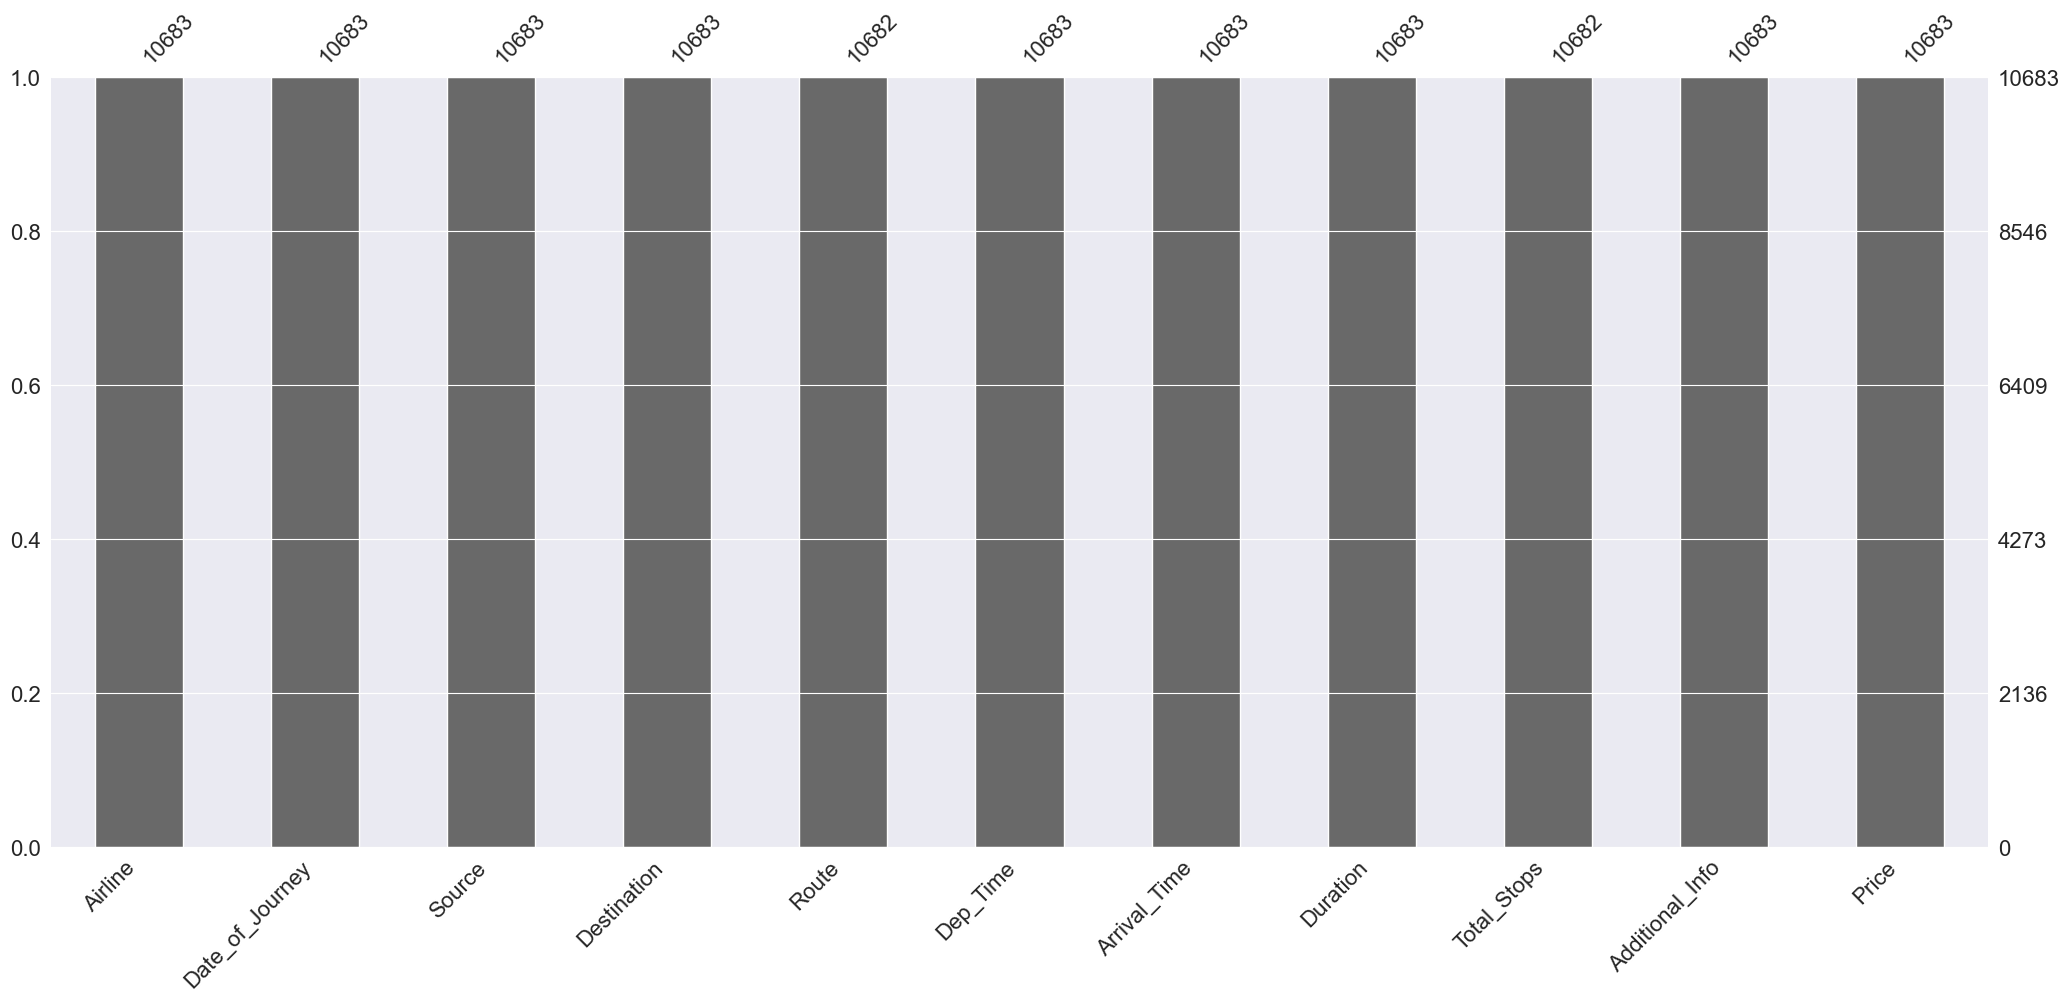

In [7]:
msno.bar(df)
plt.show

In [8]:
# удаление пустых элементов
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dtypes # тип данных у столбцов

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Новый раздел

In [11]:
def change_into_datetime(col): # изменяем тип данных у Date_of_journey, Arrival_Time, Dep_Time на дату и время вместо object
    df[col]=pd.to_datetime(df[col])

In [12]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']: 
  change_into_datetime(i)

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\1990617160.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col]=pd.to_datetime(df[col])


In [14]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
df['journey_day']=df['Date_of_Journey'].dt.day # извлекаем день и месяц из Date_of_journey в два других столбика
df['journey_month']=df['Date_of_Journey'].dt.month

In [16]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-12 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-12 05:50:00,2023-02-12 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-12 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-02-12 18:05:00,2023-02-12 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-02-12 16:50:00,2023-02-12 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2023-02-12 09:00:00,2023-02-12 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-12 18:55:00,2023-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-12 08:00:00,2023-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2023-02-12 08:55:00,2023-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2023-02-12 11:25:00,2023-02-12 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [17]:
df.drop('Date_of_Journey', axis=1, inplace=True) # удаляем Date_of_Journey, так как больше не нужен

In [18]:
# функции для извлекаем часы и минуты из Arrival_time и Dept_time в два других столбца
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    
# удаляем столбцы
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [19]:
# Вызов функции
# Departure - время вылета самолета
# Также как и с Date_of_Journey, мы можем извлечь значения из Dep_Time

# Извлекаем часы
extract_hour(df,'Dep_Time')

# Извлекаем минуты
extract_min(df,'Dep_Time')

#Удаляем столбец
drop_col(df,'Dep_Time')

In [20]:
# Извлекаем часы
extract_hour(df,'Arrival_Time')

# Извлекаем минуты
extract_min(df,'Arrival_Time')

#Удаляем столбец
drop_col(df,'Arrival_Time')

In [21]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [22]:
# отделим в столбике Duration часы от минут
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # проверяем если Duration содержит только часы
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [23]:
df['Duration']=duration

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [25]:
# берём из Duration часы и минуты и записываем в отдельные столбцы
# с помощью.apply применяем функции к каждой строке Duration
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [26]:
df['dur_hour']=df['Duration'].apply(hour)

In [27]:
df['dur_min']=df['Duration'].apply(minutes)

In [28]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [29]:
drop_col(df,'Duration')

In [30]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [31]:
# переводим новые столбцы из типа object в int64
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [32]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

In [33]:
# смотрим какие столбцы имеют значение категории
column=[column for column in df.columns if df[column].dtype=='object']
column 

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
# смотрим какие столбцы имеют значение продолжительности
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

------------------------------------------------------------------
НАЧИНАЕМ ПЕРЕВОДИТЬ ЗНАЧЕНИЯ КАТЕГОРИИ В ЧИСЛОВОЙ ФОРМАТ

In [35]:
categorical = df[column]

In [36]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


<AxesSubplot: xlabel='Airline', ylabel='Price'>

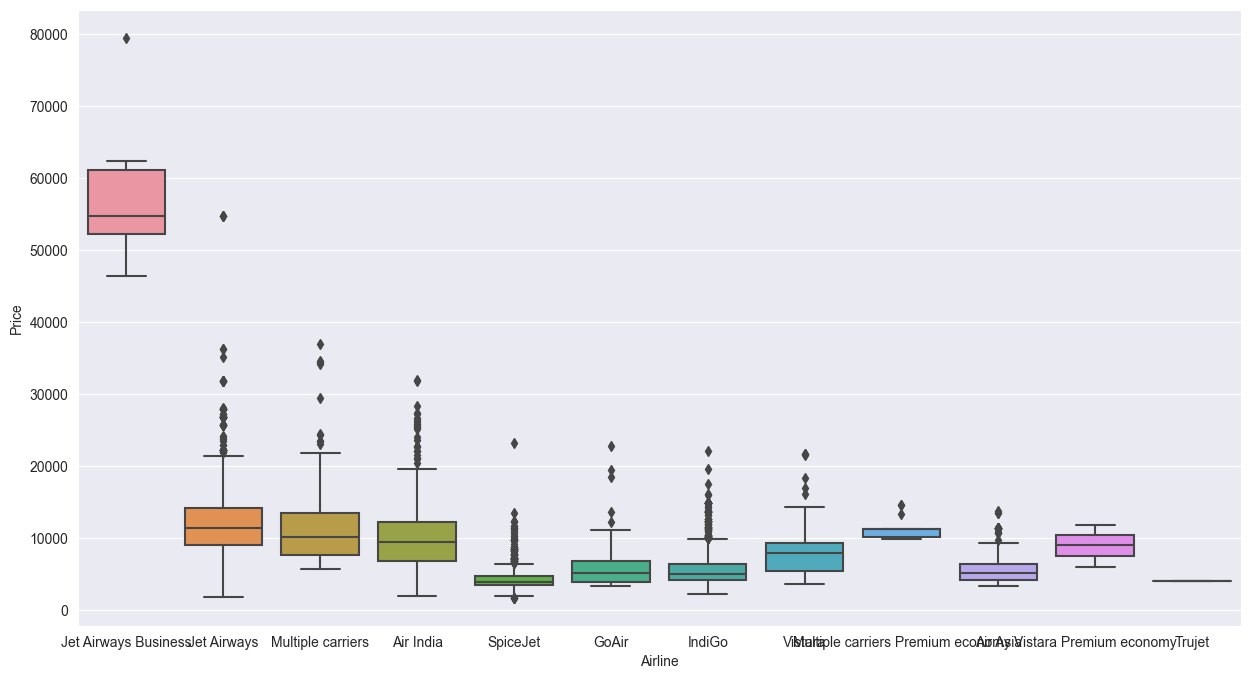

In [37]:
# график цен и авиакомпаний
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot: xlabel='Total_Stops', ylabel='Price'>

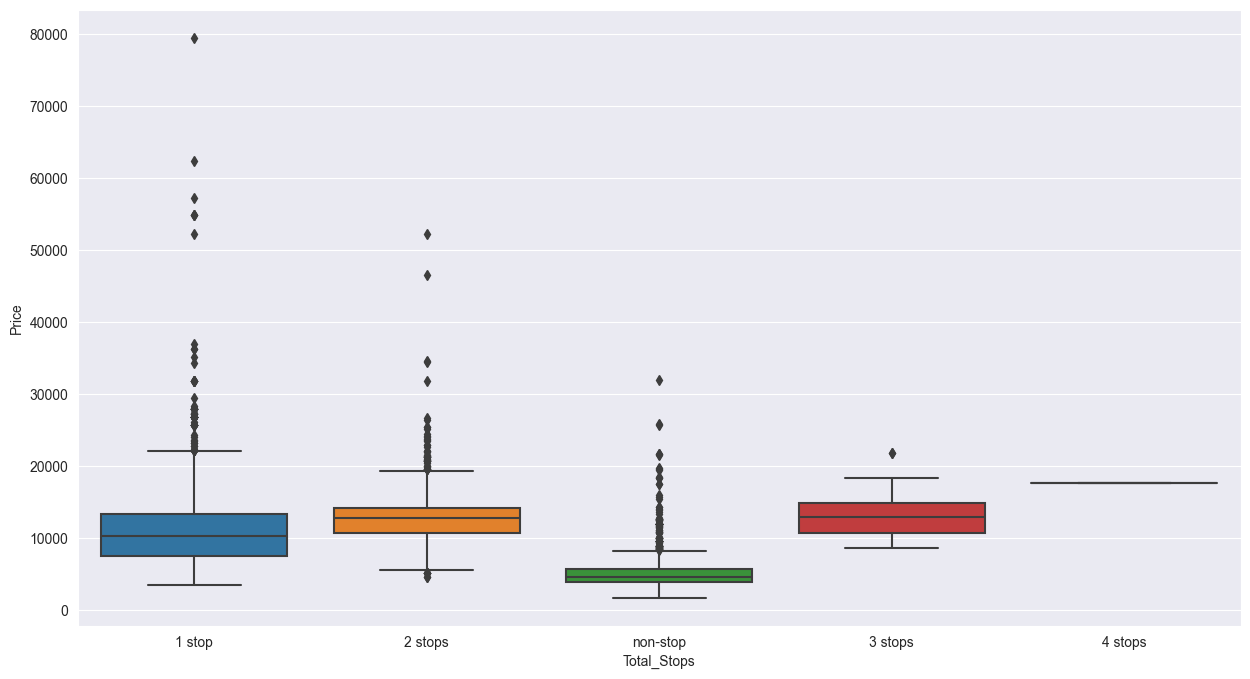

In [38]:
# график цен и количества пересадок
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [39]:
# Так как Airline это номинальное значение, мы используем OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [40]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [41]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1500x1500 with 0 Axes>

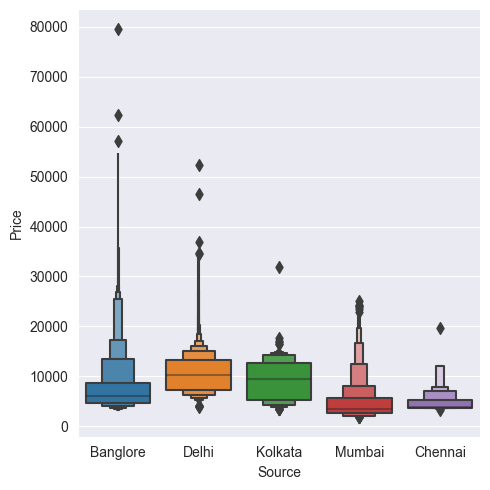

In [42]:
# график цен и город вылета

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [43]:
#encoding of source column
# кодируем исходный столбец
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot: xlabel='Destination', ylabel='Price'>

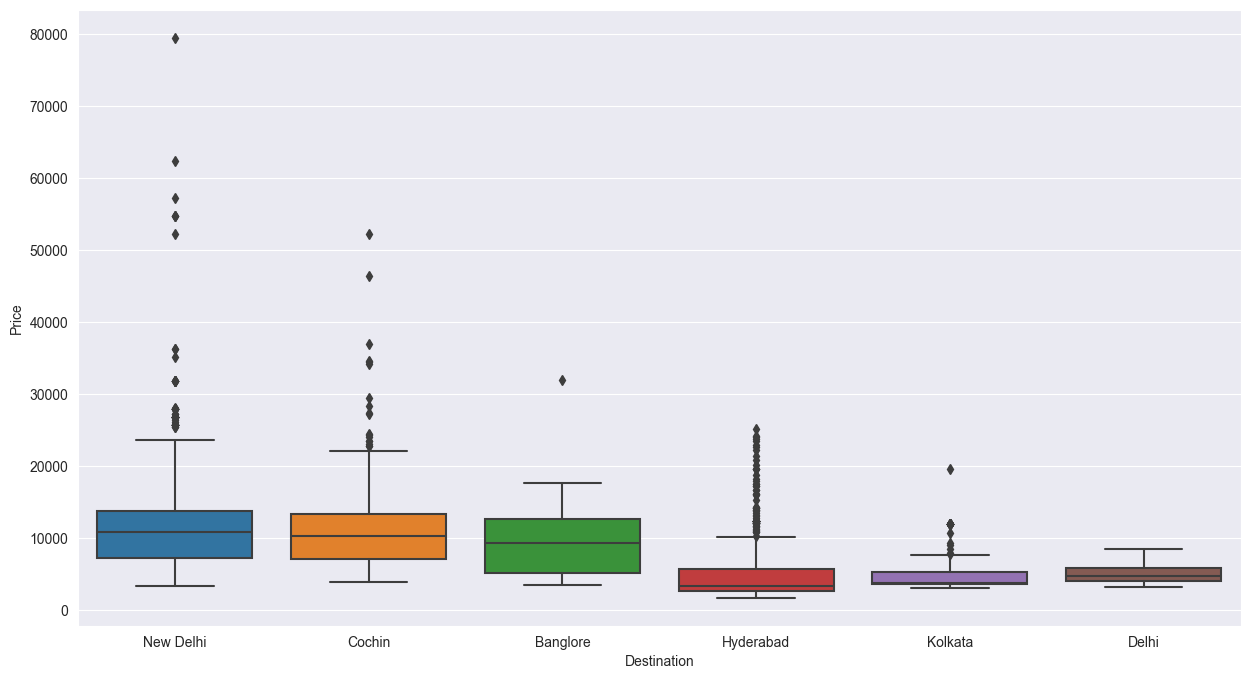

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [46]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
# столбец Route
# просматриваем данные об перелетах
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [48]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3517866178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split('→').str[0]
C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3517866178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split('→').str[1]
C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3517866178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [49]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
drop_col(categorical,'Route')

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2789660238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col,axis=1,inplace=True)


In [51]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [52]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [53]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\4261030511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [55]:
# смотрим какие есть категории в у каждого столбца
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<AxesSubplot: xlabel='Arrival_Time_hour', ylabel='Price'>

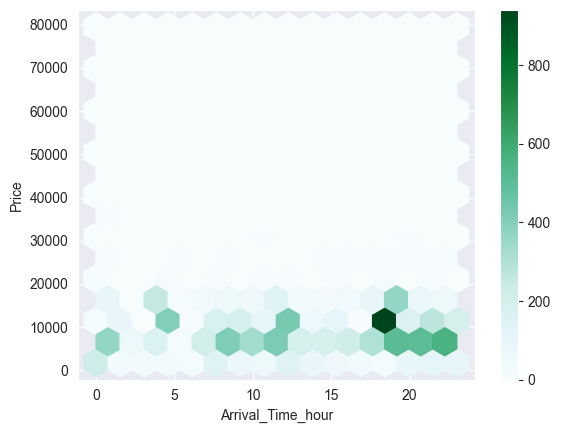

In [56]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [58]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2968119071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2968119071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2968119071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [59]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [60]:
drop_col(categorical,'Additional_Info')

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2789660238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col,axis=1,inplace=True)


In [61]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [62]:
# encoding Total stops
# кодируем Всего остановок
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\1443209771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [63]:
categorical['Total_Stops'].head(10)

0    0
1    2
2    2
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Total_Stops, dtype: int64

In [64]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2789660238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col,axis=1,inplace=True)
C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2789660238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col,axis=1,inplace=True)
C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\2789660238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col,axis=1,inplac

In [65]:
df.head(15)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [66]:
categorical.head(15)

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5
5,0,2,5,29,13,5
6,1,0,7,8,13,5
7,1,0,7,8,13,5
8,1,0,7,8,13,5
9,1,3,7,6,13,5


In [67]:
#После всей предварительной обработки наши данные готовы к моделированию

In [68]:
final_df = pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [69]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [70]:
pd.set_option('display.max_columns', 40) # вскрывает столбец с троеточием
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [71]:
def plot(data, col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\1314032618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


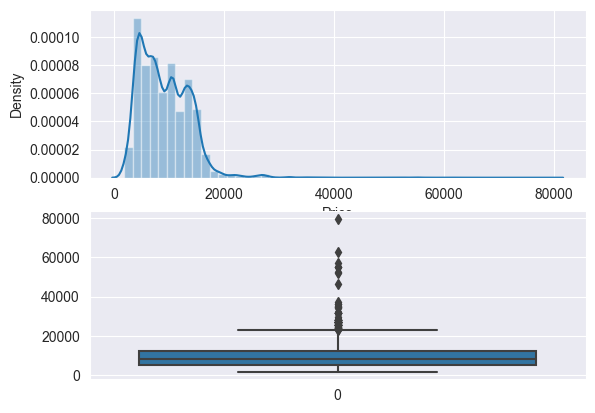

In [72]:
plot(final_df,'Price')

In [73]:
# Поскольку в характеристике цены есть некоторые отклонения, мы заменяем ее медианой.

In [74]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\1314032618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


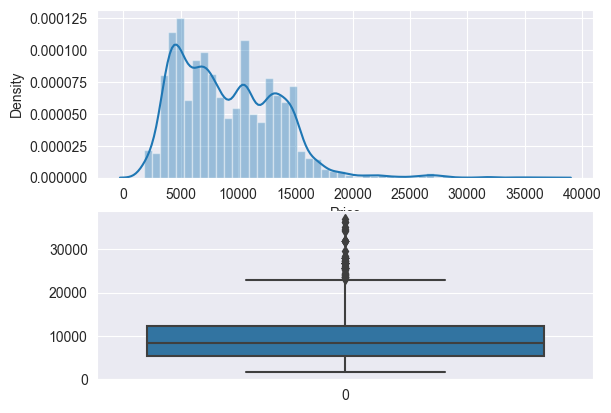

In [75]:
plot(final_df,'Price')

In [76]:
# Разделяем набор данных на столбцы X и Y

In [77]:
X=final_df.drop('Price',axis=1)
y=df['Price']

Выбор функции

Речь идет о поиске наилучшей функции и наличии хорошей связи с независимой переменной
Проблема уменьшения размерности уменьшается.

Для этого мы используем mutual_info_classif

In [78]:
from sklearn.feature_selection import mutual_info_classif

In [79]:
mutual_info_classif(X,y)

array([2.14906979, 2.35298893, 1.63499382, 0.99185675, 1.97071315,
       1.07631945, 0.76711775, 0.09366652, 0.65787115, 0.9323933 ,
       0.00303804, 0.41968999, 0.02562125, 0.26161469, 0.        ,
       0.22537599, 0.0042883 , 0.15825615, 1.5554581 , 0.88969242,
       0.29376532, 1.53197413, 0.38231528, 0.29056047, 0.17200258,
       0.29169708, 0.53198211, 1.09438579, 1.13399889, 0.7893756 ,
       1.19696434, 0.91464001, 0.88836199, 0.86412572])

In [80]:
imp = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
imp

,0
Total_Stops,2.155012
Route1,2.353415
Route2,1.616516
Route3,0.995559
Route4,2.023593
Route5,1.085452
Air India,0.754892
GoAir,0.084843
IndiGo,0.672025
Jet Airways,0.918960


In [81]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route1,2.353415
Total_Stops,2.155012
Route4,2.023593
Route2,1.616516
Delhi,1.573770
Cochin,1.552737
Arrival_Time_hour,1.197781
Dep_Time_hour,1.137304
journey_month,1.114650
Route5,1.085452


In [82]:
print(X)

       Total_Stops  Route1  Route2  Route3  Route4  Route5  Air India  GoAir  \
0                0       0      13      29      13       5          0      0   
1                2       2      25       1       3       5          1      0   
2                2       3      32       4       5       5          0      0   
3                1       2      34       3      13       5          0      0   
4                1       0      34       8      13       5          0      0   
...            ...     ...     ...     ...     ...     ...        ...    ...   
10678            0       2       5      29      13       5          0      0   
10679            0       2       5      29      13       5          1      0   
10680            0       0      13      29      13       5          0      0   
10681            0       0      13      29      13       5          0      0   
10682            2       3      16       4       5       5          1      0   

       IndiGo  Jet Airways  Jet Airways

Как мы видим из таблицы, есть несколько функций, которые имеют значение
около 0, поэтому мы должны удалить их после авторизации. Но пока мы их не
удаляем.

In [83]:
print(y)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64


МОДЕЛИ

In [84]:
# разделяем датасеты
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model=ml_model.fit(X_train, y_train)
    print("Training score: {}".format(model.score(X_train, y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score = r2_score(y_test, predictions)
    print("r2 score is: {}".format(r2score))

    print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

    sns.distplot(y_test-predictions)

ОЦЕНКИ КАЧЕСТВА РЕГРЕССИИ:
MAE - Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)
MSE - Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
r2 - Коэффициент детерминации
RMSE - Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9509128104039818
Predictions are: [ 8460.4475     16900.75       13847.32333333 ...  3821.06
  5487.95       10675.216     ]


r2 score is: 0.8448546429110315
MAE:1081.4412244674163
MSE:2987428.9701582594
RMSE:1728.4180542213333


C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3244302713.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


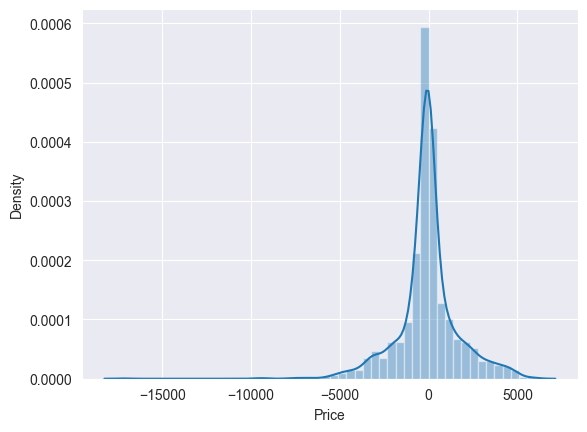

In [87]:
predict(RandomForestRegressor())

Из графа понятно, что мы предсказали 84% правильно

Model is: LogisticRegression()


C:\Users\elmar\DataspellProjects\ds_proj\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.3356348741954359
Predictions are: [14571 15237 10844 ...  4226  7408 10262]


r2 score is: 0.4418793799400499
MAE:1875.4496958352831
MSE:10746990.696303228
RMSE:3278.260315518465


C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3244302713.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


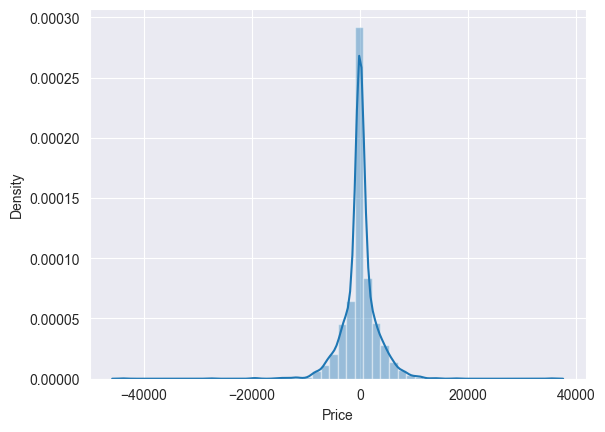

In [88]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.746380546942052
Predictions are: [10401.2 16362.4 12933.2 ...  4210.   9073.  11232.4]


r2 score is: 0.6544658783016435
MAE:1700.4507253158633
MSE:6653493.631445953
RMSE:2579.436688784191


C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3244302713.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


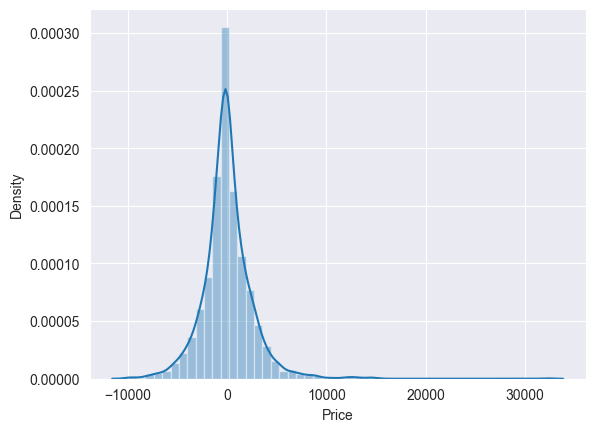

In [89]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 17024. 14571. ...  3943.  5054. 10262.]


r2 score is: 0.7400380515721866
MAE:1247.7094836998908
MSE:5005743.455324183
RMSE:2237.3518845555304


C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3244302713.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


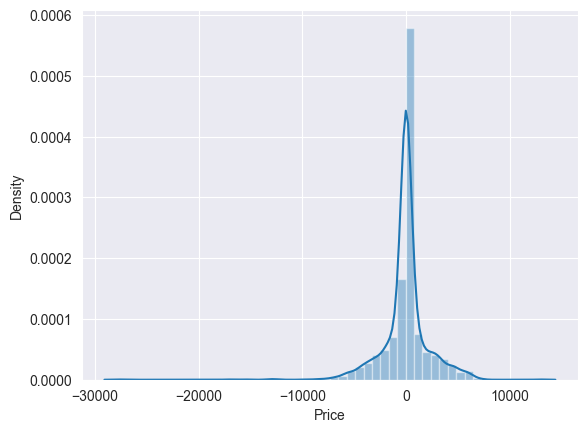

In [90]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.036808067930953814
Predictions are: [8527.74272429 8268.96331405 8459.17514562 ... 8292.53786893 8453.81861376
 8538.60587913]


r2 score is: 0.05252926427324878
MAE:3327.7462262427184
MSE:18244190.9793285
RMSE:4271.321924103649


C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3244302713.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


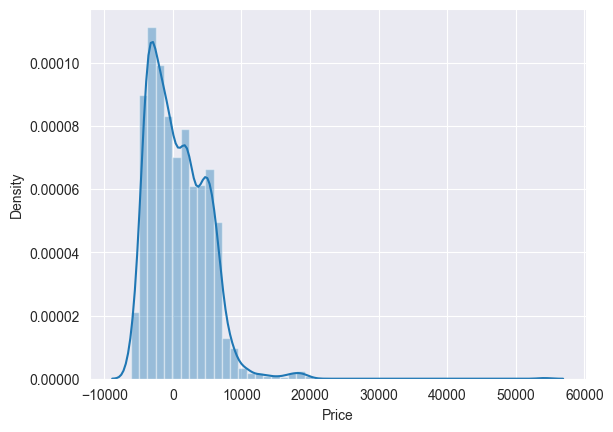

In [91]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.8004872305794601
Predictions are: [ 5702.86974497 17826.76035345 12133.74946613 ...  4547.37535805
  6959.32889786 11428.58468176]


r2 score is: 0.8168064244791147
MAE:1397.443431751956
MSE:3527516.4202569723
RMSE:1878.168368452885


C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\3244302713.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


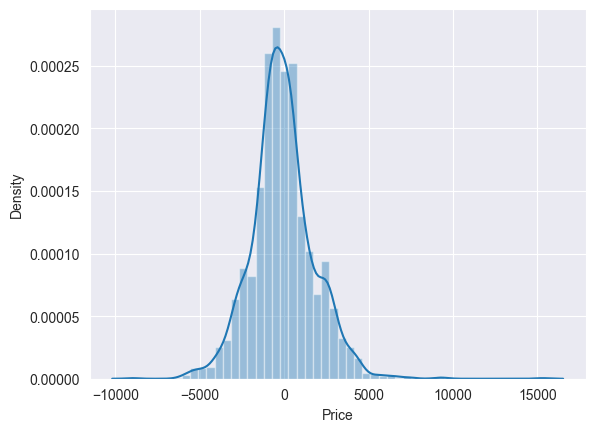

In [92]:
predict((GradientBoostingRegressor()))

Hypertunning the model

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200, 220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [96]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=3,verbose=2,n_jobs=-1)

rf_random.fit(X_train, y_train)

# лучший параметр
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\elmar\DataspellProjects\ds_proj\venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10}

In [97]:
# лучший параметр
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10}

C:\Users\elmar\AppData\Local\Temp\ipykernel_16720\234060580.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot: xlabel='Price', ylabel='Density'>

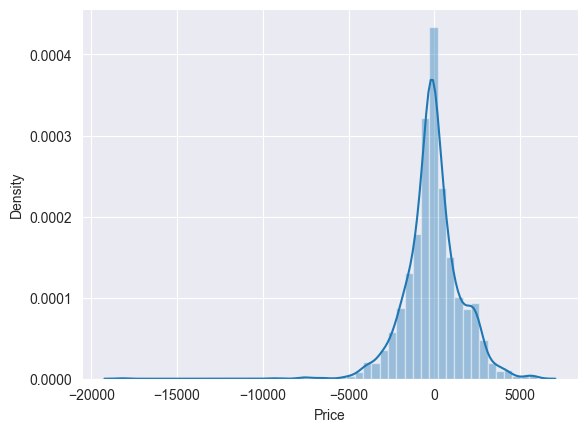

In [98]:
#предсказание значений
prediction= rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.distplot(y_test-prediction)

In [99]:
r2_score(y_test, prediction)

0.8623166131104633

## After hypertuning,the accuracy increases .
## После hypertuning, точность увеличивается.